In [1]:
from PIL import Image
import cv2 as cv    
import pytesseract
import numpy as npz
import zipfile
import os
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
# loading the face detection classifier
face_cascade = cv.CascadeClassifier('readonly/haarcascade_frontalface_default.xml')

In [2]:
#Extract de zip file
zip = zipfile.ZipFile("./readonly/small_img.zip", 'r')
zip.extractall('small_img')
zip.close()
#Get the files names
files_small = os.listdir("small_img")

In [3]:
#Text Image Small Set
def list_files_small():
    image_text = []
    for file in files_small:
        image = Image.open(("./small_img/"+file))
        text = pytesseract.image_to_string(image)
        image_text.append((file, text))
    return image_text

In [4]:
#General Method to recognize and display collage
def face_image_collage(word, image_text):
    for file, text in image_text:
        if word in text:
            print("Results found in file {}".format(file))
            faces = (face_recognition(file))
            if len(faces) > 0:
                image_collage(faces)
            else:
                print("There is a text coincidence but no faces in the image")

In [5]:
#Detection of the faces in the newspaper
def face_recognition(file):
    image = Image.open(("./small_img/"+file))
    faces = face_cascade.detectMultiScale(np.array(image),1.30)
    crop_faces = []
    for x, y, w, h in faces:
        image_crop = image.crop((x,y,x+w,y+h))
        crop_faces.append(image_crop)
    return crop_faces

In [6]:
#Making the collage of faces
def image_collage(faces):
    canvas = Image.new("RGB", (750, 150 * int(np.ceil(len(faces)/5))))
    x, y = 0,0
    for face in faces:
        face.thumbnail((150,150))
        canvas.paste(face, (x,y))
        if x + 150 == canvas.width:
            x = 0
            y += 150
        else:
            x += 150
    display(canvas)

Results found in file a-0.png


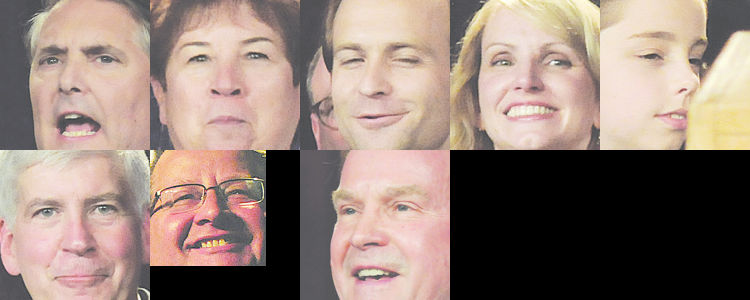

Results found in file a-3.png


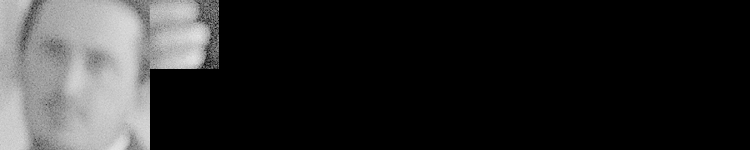

In [7]:
#Small Images
face_image_collage("Christopher", list_files_small())